In [1]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict, Literal

In [2]:
class QuadState(TypedDict):
  
  a : int
  b: int
  c:int

  equation : str
  descrimenant : float
  result : str

In [4]:
def show_equation(state: QuadState):

  equation = f'{state["a"]}x^2{state["b"]}x{state["c"]}'

  return {'equation':equation}

def calculate_descrimenant(state:QuadState):

  descrimenant = (state['b'])**2-(4 * state['a']*state['c'])

  return {'descrimenant': descrimenant}

def real_roots(state: QuadState):

  root1 = (-state['b'] + state['descrimenant']**0.5) / (2*state['a'])
  root2 = (-state['b'] - state['descrimenant']**0.5) / (2*state['a'])

  result =  f'the roots are {root1} and {root2}'
  
  return {'result' : result}


def repeated_roots(state: QuadState):

  root = (-state['b'] ) / (2 * state['a'])
  result =  f'only repeating  roots is {root} '
  
  return {'result' : result}

def no_real_roots(state: QuadState):

   result =  f'no real roots '
   return {'result' : result}

def check_condition(state : QuadState) -> Literal["real_roots", "repeated_roots" , "no_real_roots"]:

  if state['descrimenant'] > 0 :
    return "real_roots"
  elif state['descrimenant'] == 0:
    return "repeated_roots"
  else :
    return "no_real_roots"

In [6]:
graph = StateGraph(QuadState)

graph.add_node('show_equation', show_equation)
graph.add_node('calculate_descrimenant', calculate_descrimenant)
graph.add_node('real_roots', real_roots)
graph.add_node('repeated_roots', repeated_roots)
graph.add_node('no_real_roots', no_real_roots)

graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_descrimenant')

graph.add_conditional_edges('calculate_descrimenant' , check_condition)
graph.add_edge('real_roots', END)
graph.add_edge('repeated_roots', END)
graph.add_edge('no_real_roots', END)


workflow = graph.compile()



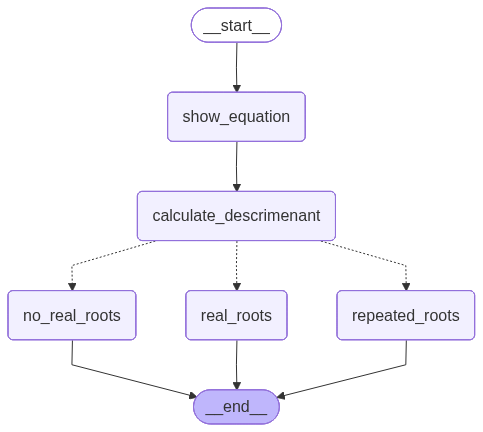

In [7]:
workflow

In [10]:
initial_state = {'a':4, 'b': -5 , 'c' : -4}
final_state = workflow.invoke(initial_state)
print(final_state)

{'a': 4, 'b': -5, 'c': -4, 'equation': '4x^2-5x-4', 'descrimenant': 89, 'result': 'the roots are 1.8042476415070754 and -0.5542476415070754'}
